# Feature Checking

In [7]:
import os
import sys
from pathlib import Path

# use Path(os.getcwd()) outside the vscode to get the root folder

# Root Folder - use hardcode in vscode jupyter notebook, due to kernel inconsistency
ROOT_DIR = "d:/Desktop/Data Science Learning/DS Self Projects/IITG Capstone/Stock Market Anomaly Detection/stock-anomaly-detector/"
project_root = ROOT_DIR

# selecing the root as working directory
os.chdir(project_root)


# Adding the project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root) 

In [3]:
import pandas as pd

df = pd.read_csv("data/processed/features.csv", parse_dates=["date"])
df.head()


,date,ticker,ret,ret_z,vol_z,range_pct
0,1999-03-10,QQQ,NaN,NaN,NaN,NaN
1,1999-03-11,QQQ,0.004896,NaN,NaN,NaN
2,1999-03-12,QQQ,-0.024361,NaN,NaN,NaN
3,1999-03-15,QQQ,0.028714,NaN,NaN,NaN
4,1999-03-16,QQQ,0.008495,NaN,NaN,NaN


## Features Distribution check 

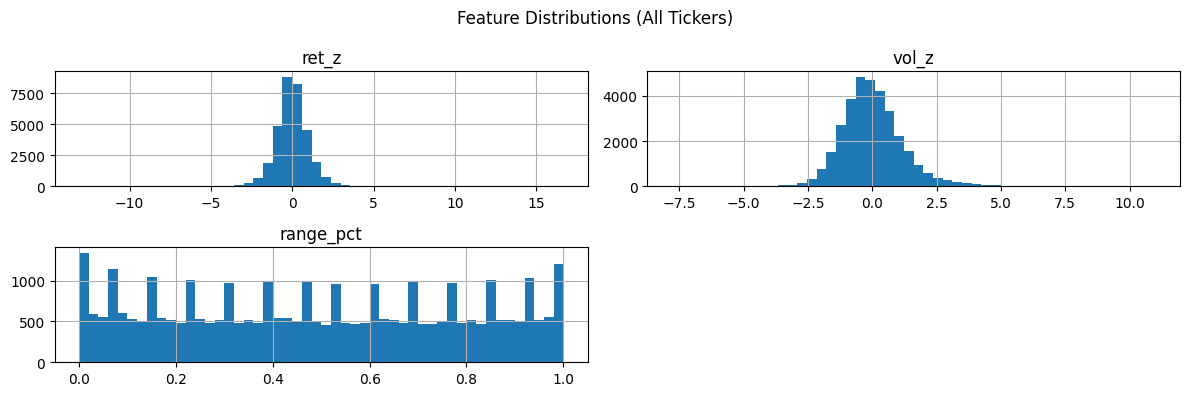

In [4]:
import matplotlib.pyplot as plt

features = ["ret_z", "vol_z", "range_pct"]

df[features].hist(bins=50, figsize=(12, 4))
plt.suptitle("Feature Distributions (All Tickers)")
plt.tight_layout()
plt.show()


## Time Evolution 

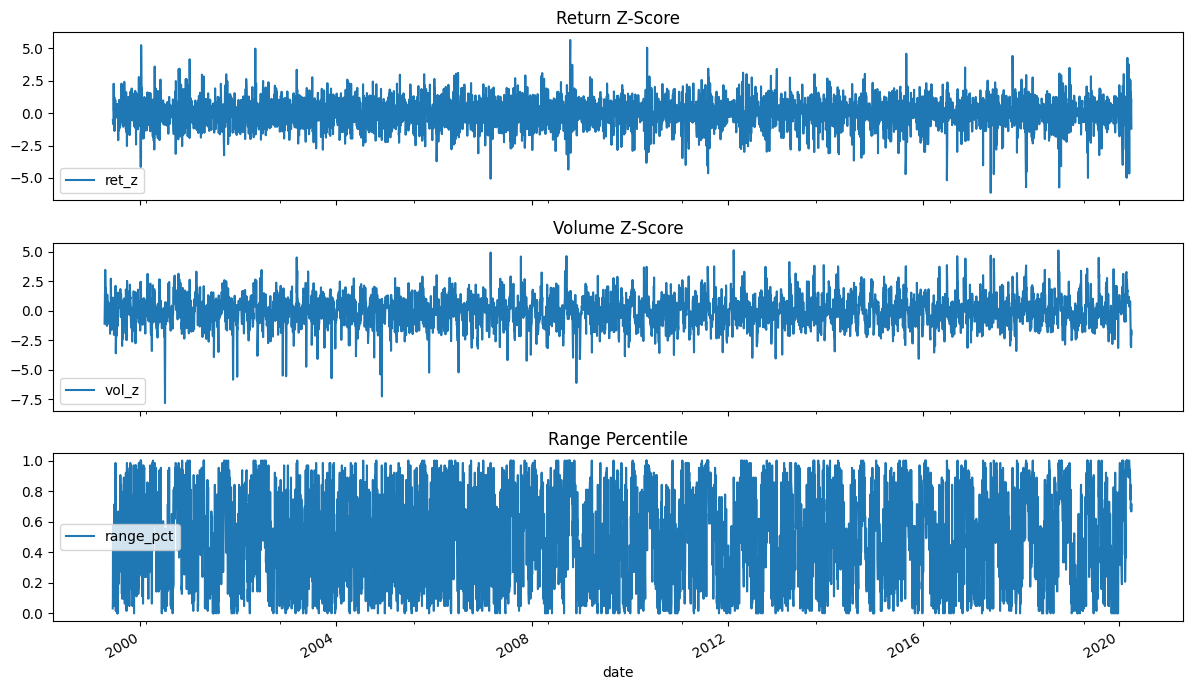

In [5]:
ticker = "QQQ"
df_t = df[df["ticker"] == ticker]

fig, axes = plt.subplots(3, 1, figsize=(12, 7), sharex=True)

df_t.plot(x="date", y="ret_z", ax=axes[0], title="Return Z-Score")
df_t.plot(x="date", y="vol_z", ax=axes[1], title="Volume Z-Score")
df_t.plot(x="date", y="range_pct", ax=axes[2], title="Range Percentile")

plt.tight_layout()
plt.show()


In [6]:
df[features].corr()


,ret_z,vol_z,range_pct
ret_z,1.000000,0.010073,-0.033574
vol_z,0.010073,1.000000,0.546496
range_pct,-0.033574,0.546496,1.000000


**Feature Sanity Summary**

The engineered features exhibit economically meaningful behavior. Return and volume z-scores show heavy-tailed distributions, while intraday range percentiles remain bounded. Feature spikes align with known stress periods (2020 Q1), and correlations between features are moderate, indicating complementary signals suitable for downstream anomaly detection.